In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Define the neural network class
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size):
    # Initialize weights with random values
    self.weights1 = np.random.normal(0, 0.001, size=(input_size, hidden_size))
    self.weights2 = np.random.normal(0, 0.001, size=(hidden_size, output_size))

  def forward(self, X):
    # Forward propagation
    self.hidden_layer_input = np.dot(X, self.weights1)
    self.hidden_layer_output = sigmoid(self.hidden_layer_input)
    self.output_layer_input = np.dot(self.hidden_layer_output, self.weights2)
    self.output = sigmoid(self.output_layer_input)
    return self.output

  def backward(self, X, y, learning_rate):
    # Backward propagation and weight update
    output_error = y - self.output
    output_delta = output_error * sigmoid_derivative(self.output)

    hidden_error = output_delta.dot(self.weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

    self.weights2 += self.hidden_layer_output.T.dot(output_delta) * learning_rate
    self.weights1 += X.T.dot(hidden_delta) * learning_rate
    self.output_error = output_error

  def train(self, X, y, epochs, learning_rate):
    error = []
    # Train the neural network
    for epoch in range(epochs):
      self.forward(X)
      self.backward(X, y, learning_rate)
      error.append(self.output_error)

    return error

# Create and train the neural network
input_size = 8
hidden_size = 3
output_size = 8
nn = NeuralNetwork(input_size, hidden_size, output_size)

X = np.eye(8)  # Input data
y = np.eye(8)  # Target output (same as input)

epochs = 10000
learning_rate = 0.1
unbiased_err = np.array(nn.train(X, y, epochs, learning_rate))   #err (calculated using least squares)


# Test the neural network
test_input = np.eye(8)
predictions = nn.forward(test_input)

#To see the output, run the code.
print(predictions.round())  # Predictions should be close to the input (np.eye(8))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [38]:
#Involving bias and weight decay
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Define the neural network class
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size, bias=True):
    # Initialize weights with random values
    self.weights1 = np.random.normal(0, 0.001, size=(input_size, hidden_size))
    self.weights2 = np.random.normal(0, 0.001, size=(hidden_size, output_size))
    self.bias1 = np.zeros((hidden_size, 1))
    self.bias2 = np.zeros((output_size, 1))


  def forward(self, X):
    # Forward propagation
    self.hidden_layer_input = np.dot(X, self.weights1) + self.bias1.T
    self.hidden_layer_output = sigmoid(self.hidden_layer_input)
    self.output_layer_input = np.dot(self.hidden_layer_output, self.weights2) + self.bias2.T
    self.output = sigmoid(self.output_layer_input)
    return self.output

  def backward(self, X, y, learning_rate, lamda=0):
    # Backward propagation and weight update
    output_error = y - self.output
    output_delta = output_error * sigmoid_derivative(self.output)

    hidden_error = output_delta.dot(self.weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

    self.weights2 += self.hidden_layer_output.T.dot(output_delta) * learning_rate + lamda*self.weights2
    self.weights1 += X.T.dot(hidden_delta) * learning_rate + lamda*self.weights1
    self.bias1 += ((hidden_delta).mean(axis=0)).reshape(self.bias1.shape)
    self.bias2 += output_delta.mean(axis=0).reshape(self.bias2.shape)
    self.output_error = output_error
    self.output_delta = output_delta



  def train(self, X, y, epochs, learning_rate, lamda=0):
    error = []
    # Train the neural network
    for epoch in range(epochs):
      self.forward(X)
      self.backward(X, y, learning_rate, lamda)
      error.append(self.output_error)

    return error

# Create and train the neural network
input_size = 8
hidden_size = 3
output_size = 8
nn = NeuralNetwork(input_size, hidden_size, output_size)

X = np.eye(8)  # Input data
y = np.eye(8)  # Target output (same as input)

epochs = 10000
learning_rate = 0.1
biased_err = np.array(nn.train(X, y, epochs, learning_rate, 0))

# Test the neural network
test_input = np.eye(8)
predictions = nn.forward(test_input)

#To see the output, run the code.
print(predictions)
print('rounded values:')
print(predictions.round())  # Predictions should be close to the input (np.eye(8))

[[8.57498042e-01 7.11927339e-02 4.38446739e-04 3.56402439e-02
  8.68583094e-02 1.69816579e-04 2.02673508e-05 1.07824710e-04]
 [1.02598809e-01 8.80972604e-01 8.99957394e-06 1.76486192e-02
  5.40665522e-03 9.18148385e-02 6.75954350e-05 1.12310648e-02]
 [4.82763159e-02 1.24568213e-06 9.14645748e-01 3.01680129e-02
  3.49979752e-02 1.43750725e-06 3.34649237e-02 1.29528377e-03]
 [7.66333032e-02 3.76490174e-02 6.45331430e-02 9.22439377e-01
  7.62298182e-05 1.02222317e-05 6.66190240e-05 6.41947734e-02]
 [6.96245649e-02 2.45419792e-04 6.35926009e-04 1.55510312e-05
  8.63116621e-01 3.53226185e-02 4.58771978e-02 1.30841209e-04]
 [2.46681919e-03 8.15672382e-02 1.41337511e-05 5.25098377e-05
  8.32974328e-02 8.80861360e-01 3.35523549e-02 2.16723555e-02]
 [1.10078359e-04 5.62625116e-06 7.48371034e-02 4.16500724e-05
  7.72262253e-02 5.80803300e-02 9.21626778e-01 6.02934173e-02]
 [8.20011413e-05 2.41373745e-02 8.67775306e-03 6.68177941e-02
  4.72521608e-05 4.53354463e-02 4.62555298e-02 9.00502908e-01]]

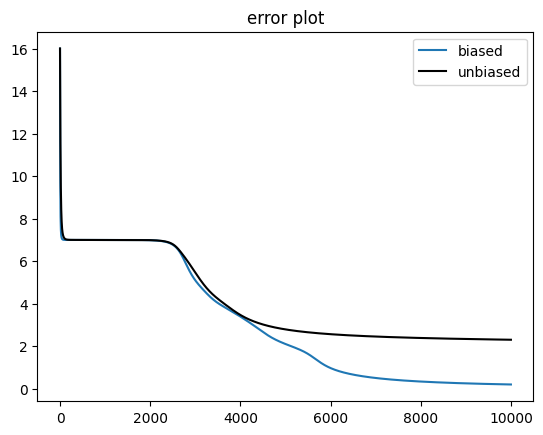

In [39]:
plt.plot(((biased_err**2).sum(axis=2)).sum(axis=1), label = 'biased')     #nn with bias
plt.plot(((unbiased_err**2).sum(axis=2)).sum(axis=1), 'k', label= 'unbiased')   #nn without bias
plt.legend()
plt.title('error plot')
plt.show()

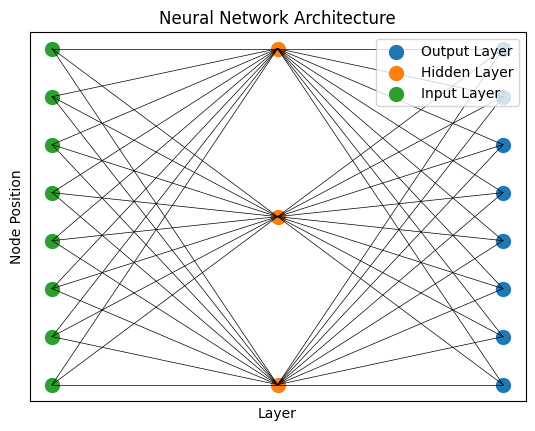

In [40]:
# Visualtization

# Define the number of nodes in each layer
input_nodes = 8
hidden_nodes = 3
output_nodes = 8


input_y = np.linspace(0, 1, input_nodes)  # Now y-axis
hidden_y = np.linspace(0, 1, hidden_nodes) # Now y-axis
output_y = np.linspace(0, 1, output_nodes) # Now y-axis

input_x = 1  # Now x-axis
hidden_x = 0.5 # Now x-axis
output_x = 0 # Now x-axis

# Create plot
fig, ax = plt.subplots()

# Plot nodes
ax.scatter([input_x] * input_nodes, input_y, label='Output Layer', s=100)
ax.scatter([hidden_x] * hidden_nodes, hidden_y, label='Hidden Layer', s=100)
ax.scatter([output_x] * output_nodes, output_y, label='Input Layer', s=100)


for i in range(input_nodes):
    for j in range(hidden_nodes):
        ax.plot([input_x, hidden_x], [input_y[i], hidden_y[j]], 'k-', linewidth=0.5)

for i in range(hidden_nodes):
    for j in range(output_nodes):
        ax.plot([hidden_x, output_x], [hidden_y[i], output_y[j]], 'k-', linewidth=0.5)

# Set plot properties
ax.set_ylabel('Node Position')
ax.set_xlabel('Layer')
ax.set_title('Neural Network Architecture')
ax.legend()
ax.set_yticks([])
ax.set_xticks([])

# Display plot
#plt.savefig('NN.pdf')
plt.show()